In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("emails.csv")

In [28]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [30]:
data.dropna()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [31]:
data.drop_duplicates()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [32]:
data.shape

(5728, 2)

In [33]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [34]:
data.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [35]:
print(data['spam'].value_counts(normalize=True))

0    0.761173
1    0.238827
Name: spam, dtype: float64


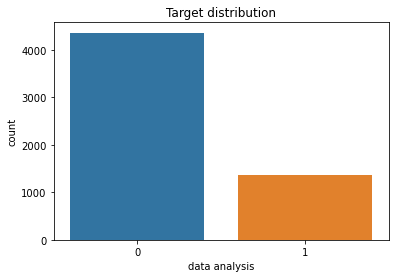

In [37]:
sns.countplot(x='spam', data = data)
plt.title('Target distribution')
plt.xlabel('data analysis')
plt.show()

array([[<AxesSubplot:title={'center':'spam'}>]], dtype=object)

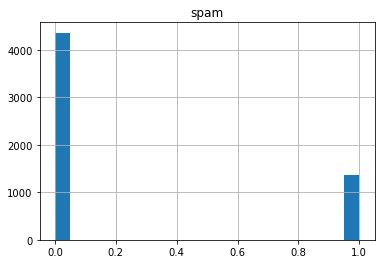

In [38]:
data.hist(bins = 20)

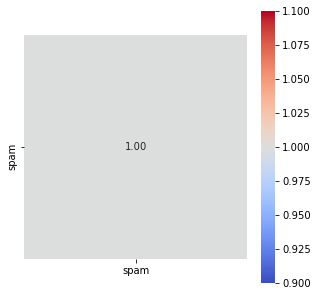

In [50]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.show()

In [51]:
from sklearn.feature_extraction.text import CountVectorizer


In [52]:
vector = CountVectorizer()

In [59]:
x = vector.fit_transform(data['text'])
y = data['spam']

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20) 

In [70]:
from sklearn.naive_bayes import MultinomialNB
naive3 =  MultinomialNB()

In [71]:
naive3.fit(x_train,y_train)

MultinomialNB()

In [72]:
Y_pred = naive3.predict(x_test)

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       860
           1       0.98      0.99      0.98       286

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

